In [1]:
import pandas as pd
%matplotlib inline
import pylab as plt
import numpy as np
import scipy as sc
import scipy.stats
import math

In [2]:
# data = pd.read_csv("../data/with_scores.csv")
# data

In [3]:
# data.describe().T

In [4]:
# data.describe().T

In [5]:
# cols = ['ap_num_scr'+str(i) for i in range(1,6)] + ['ap_num_test_takers', 'app_num', 'adm_num', 'app_gpa', 'adm_gpa']
# cleaned = data.dropna(axis=0, how='any', subset=cols)
# cleaned.describe().T

In [6]:
# cols = ['sat_math_avg', 'sat_num_test_takers', 'sat_total_avg', 'sat_verbal_avg']
# cleaned.dropna(axis=0, how='any', subset=cols).describe().T

In [7]:
data = pd.read_csv("../data/with_scores.csv")
data = data[data['state']=='California']
data = data[data['ethnicity'] == 'All']
data = data[data['campus'] != 'Universitywide']
data['yield'] = data['enr_num'] / data['adm_num']

In [8]:
X_cols = ['year', 
        'app_num', 'adm_num', 
        'app_gpa', 'adm_gpa',
       'distance',
       'ap_num_scr1', 'ap_num_scr2', 'ap_num_scr3', 'ap_num_scr4', 'ap_num_scr5',
       'ap_num_test_takers',
       'enroll12',
       'sat_total_avg', 'sat_num_test_takers']
y_col = ['yield']
relevant = data[X_cols+y_col].dropna()
X = relevant[X_cols]
y = relevant[y_col]

In [9]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
year,10986.0,2005.464864,4.255249,1998.000000,2002.000000,2006.000000,2009.000000,2012.000000
app_num,10986.0,69.075551,48.516296,6.000000,36.000000,57.000000,89.000000,445.000000
adm_num,10986.0,33.450118,26.116251,5.000000,17.000000,26.000000,42.000000,310.000000
app_gpa,10986.0,3.679760,0.167057,2.756765,3.567136,3.690965,3.801327,4.206842
adm_gpa,10986.0,3.925540,0.215042,3.231429,3.778244,3.956483,4.095804,4.358571
distance,10986.0,245409.696796,244390.960429,662.000000,61021.000000,131344.000000,452704.750000,960797.000000
ap_num_scr1,10986.0,86.746040,73.734825,0.000000,34.000000,65.000000,118.000000,602.000000
ap_num_scr2,10986.0,132.025487,77.540889,0.000000,76.000000,120.000000,174.000000,517.000000
ap_num_scr3,10986.0,173.034043,112.339028,0.000000,89.000000,152.000000,235.000000,642.000000
ap_num_scr4,10986.0,151.095940,121.652113,0.000000,60.000000,115.000000,215.000000,719.000000


In [10]:
y.describe()

,yield
count,10986.000000
mean,0.375728
std,0.172386
min,0.060241
25%,0.250000
50%,0.346154
75%,0.470588
max,1.000000


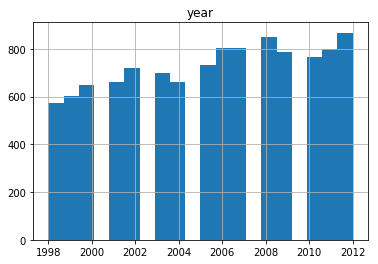

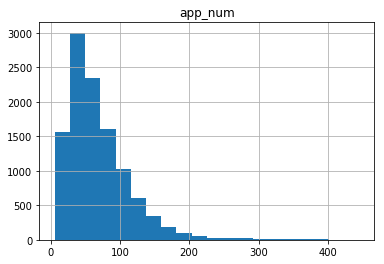

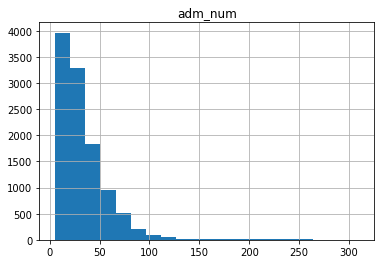

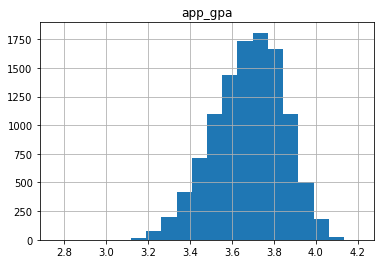

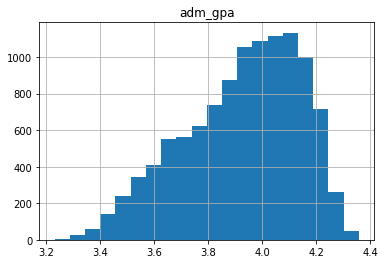

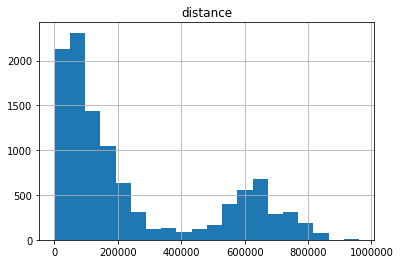

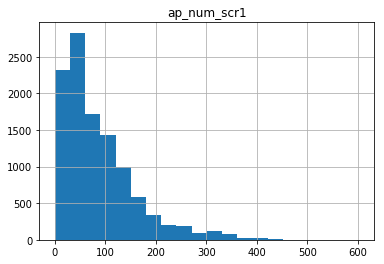

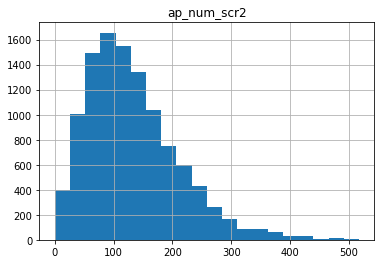

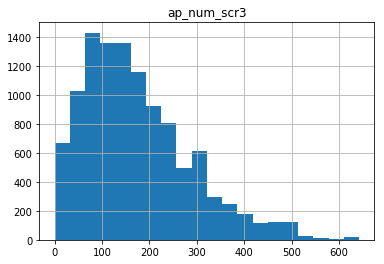

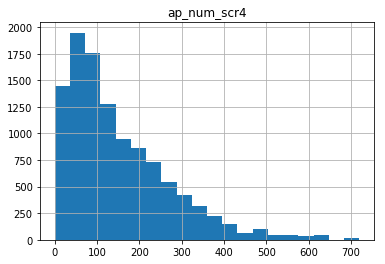

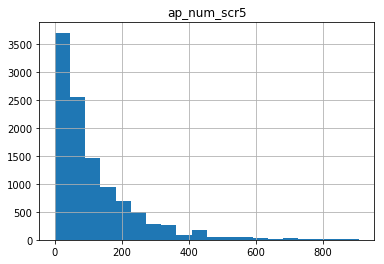

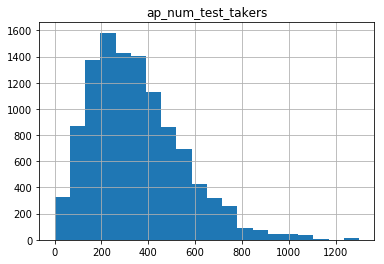

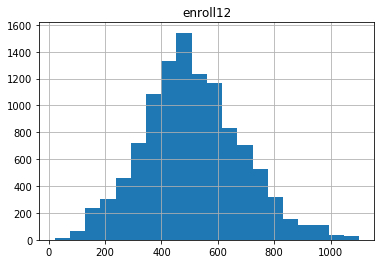

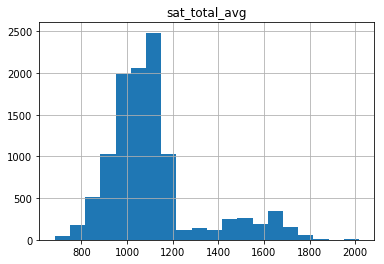

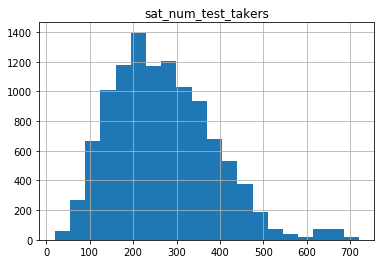

In [11]:
for col in X.columns:
    plt.figure()
    plt.title(col)
    X[col].hist(bins=20)

## Normalize all the data by taking z-scores

In [12]:
X_z = (X-X.mean(axis=0)) / X.std(axis=0)
y_z = (y-y.mean(axis=0)) / y.std(axis=0)

In [13]:
X_z.head()

,year,app_num,adm_num,app_gpa,adm_gpa,distance,ap_num_scr1,ap_num_scr2,ap_num_scr3,ap_num_scr4,ap_num_scr5,ap_num_test_takers,enroll12,sat_total_avg,sat_num_test_takers
3750,-1.754272,-0.496236,-1.051074,-0.252634,0.090492,-0.868988,-0.430543,-0.903078,-1.166416,-1.052969,-0.851295,-1.231104,-0.539324,-0.741189,0.410407
3757,-1.754272,0.451899,0.021055,0.034395,-0.322217,-0.914231,-1.095087,-1.289971,-0.614515,-0.173412,0.269795,-0.540952,-1.208164,0.336729,-0.265711
3766,-1.754272,-0.619906,-0.859623,1.194033,0.967697,-0.679692,-1.000152,-0.619357,-0.899367,-1.102290,-0.812096,-1.256292,-0.676522,-0.494669,-0.642283
3769,-1.754272,-0.310732,-0.821332,0.499163,-0.176897,1.480031,-0.932342,-1.277074,-0.765843,-0.732383,-0.498504,-0.888547,-0.585056,0.041873,-0.017516
3773,-1.754272,0.163336,-0.515010,1.259296,0.642403,-0.940091,-0.701786,-1.006250,-0.694630,-0.798144,-0.655300,-0.928848,-0.785137,-0.373827,-0.197243


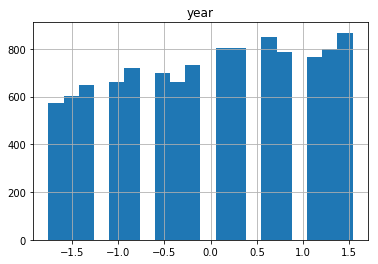

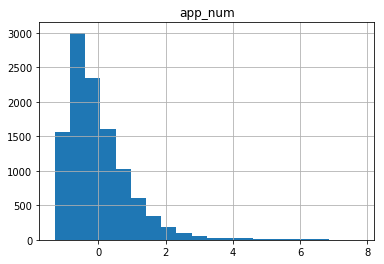

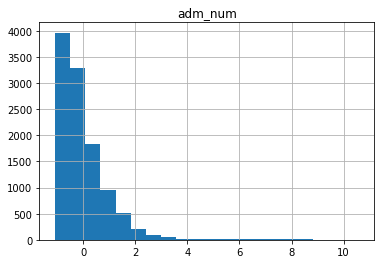

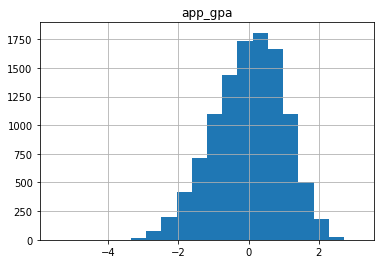

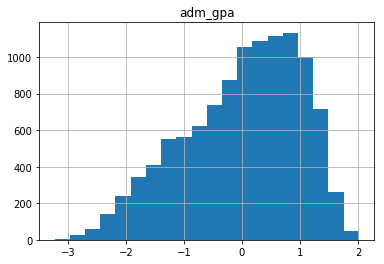

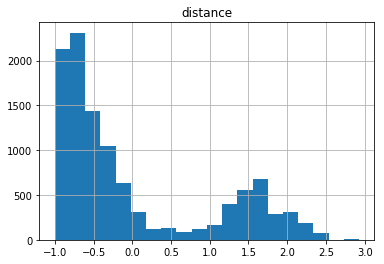

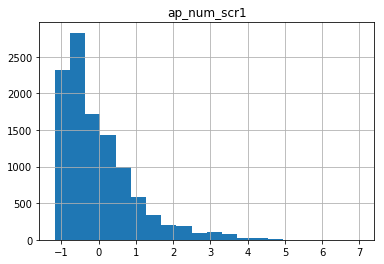

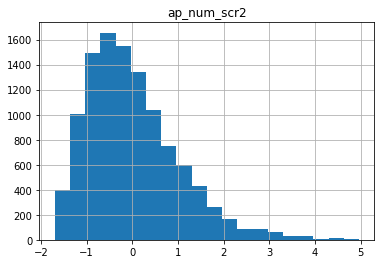

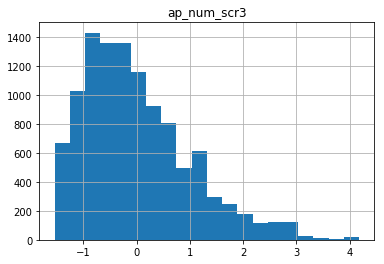

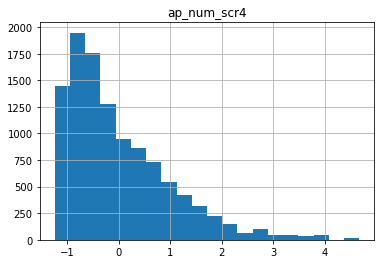

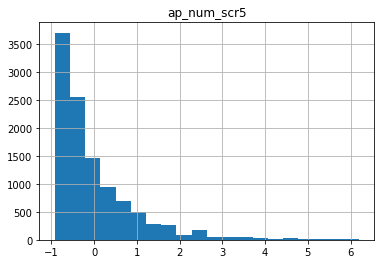

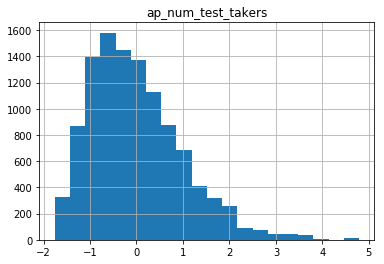

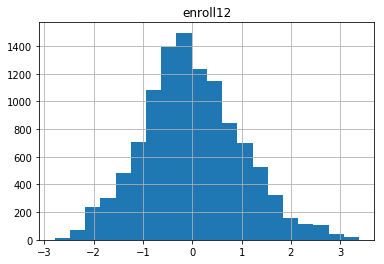

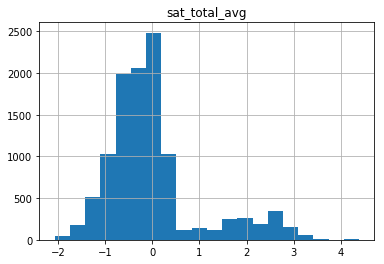

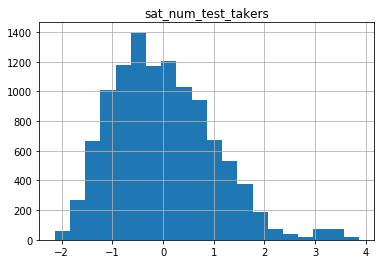

In [46]:
for col in X_z.columns:
    plt.figure()
    plt.title(col)
    X_z[col].hist(bins=20)

## Split the data into train and test sets
Use all early years for training, and later years for testing. This is to emulate the real fact that universities would train and evaluate this way.

In [14]:
RATIO = .7
years = X_z['year'].unique()
cutoff_year = years[  int(math.ceil(len(years)*RATIO))  ]
train_idxs, test_idxs = X_z['year'] <= cutoff_year, X_z['year'] > cutoff_year

In [20]:
X_train, X_test = X_z[train_idxs], X_z[test_idxs]
y_train, y_test = y_z[train_idxs], y_z[test_idxs]

## make and fit a linear regressor

In [24]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
y_pred = reg.predict(X_test)
data_result = pd.DataFrame(data={'actual':y_test.values.flatten(), 'predicted':y_pred.flatten()}) 
data_result.head(10)

,actual,predicted
0,2.896241,0.208322
1,2.896241,0.551329
2,-0.171559,0.638009
3,0.051553,0.373418
4,1.687714,0.609557
5,0.342570,0.812028
6,-0.366783,0.093353
7,0.193534,-0.118551
8,0.627328,0.328175
9,1.511928,0.618281
